Resultados de Forward Stepwise Selection:
   Número de predictores  R cuadrado ajustado         SSR  Cp de Mallows  \
0                      1             0.008433  837.765653       8.548629   
1                      2             0.002840  833.894193       8.682816   
2                      3            -0.003794  830.788080       8.827123   
3                      4            -0.013557  830.130296       9.000360   
4                      5            -0.023774  829.672176       9.179352   

          AIC         BIC  
0  500.344529  505.554869  
1  501.881341  509.696851  
2  503.508162  513.928843  
3  505.428955  518.454806  
4  507.373753  523.004775  

Resultados de Backward Stepwise Selection:
   Número de predictores  R cuadrado ajustado         SSR  Cp de Mallows  \
0                      4            -0.013557  830.130296       9.000360   
1                      3            -0.003794  830.788080       8.827123   
2                      2             0.002840  833.894193    

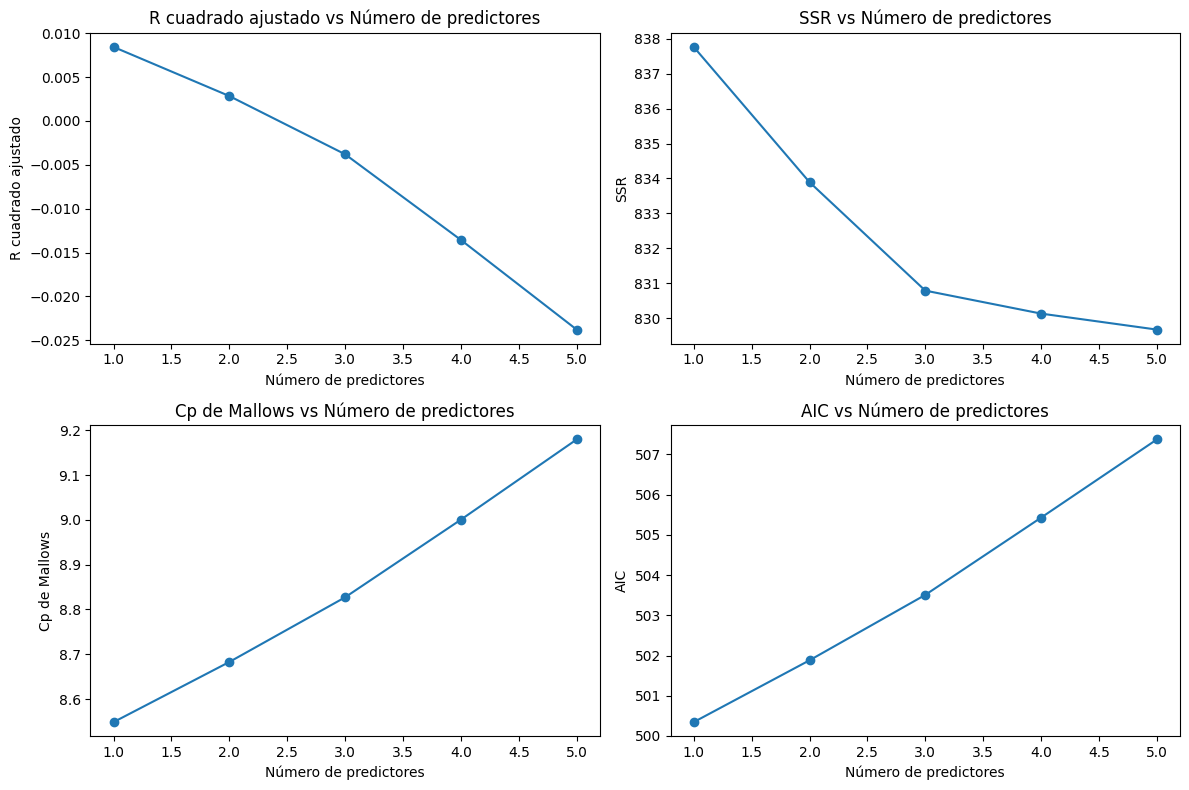

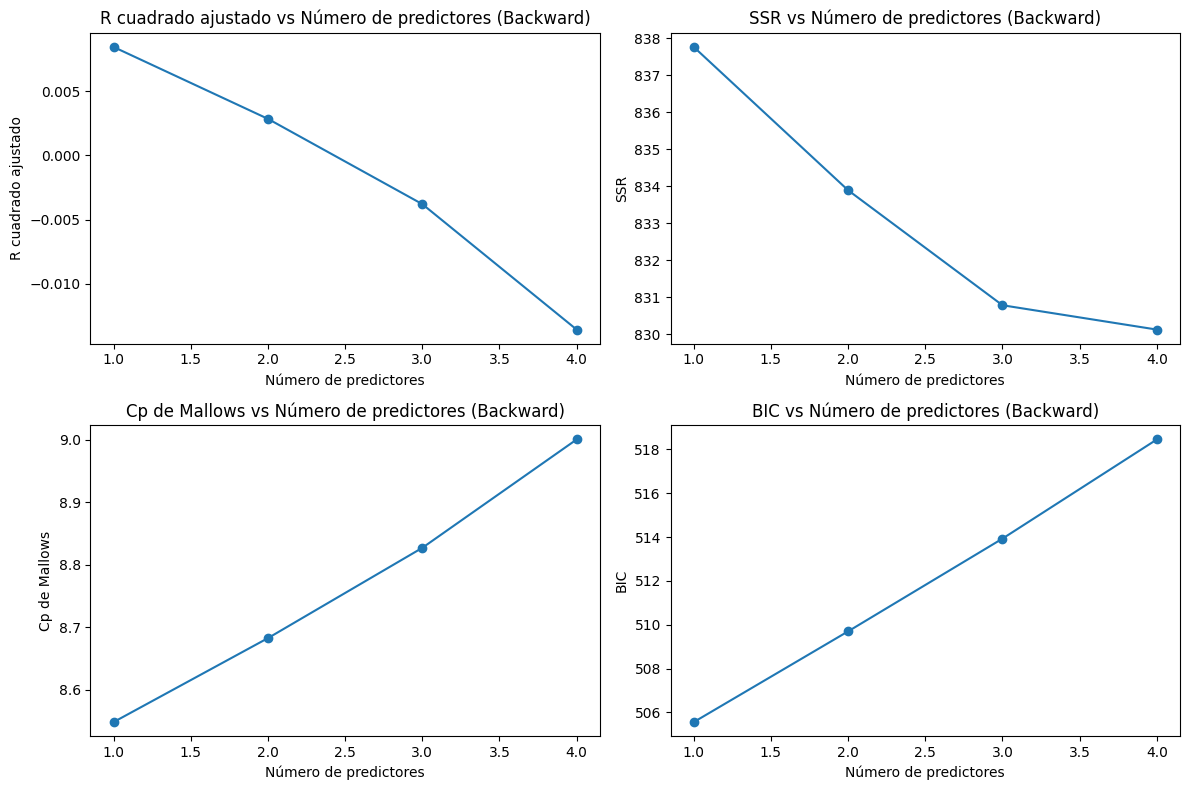

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(0)
n = 100  # Número de observaciones
p = 5    # Número de características

# Generar datos simulados
data = {}
data['y'] = 2 * np.random.randn(n) + 1.5 * np.random.randn(n) + np.random.randn(n)
for i in range(p):
    data[f'X{i+1}'] = np.random.randn(n)

# Crear un DataFrame
df = pd.DataFrame(data)

# Función para calcular el R cuadrado ajustado
def calculate_adj_r2(X, y, selected_features):
    X_selected = X[selected_features]
    model = sm.OLS(y, sm.add_constant(X_selected)).fit()
    return model.rsquared_adj

# Función para calcular SSR (Sum of Squares Residual)
def calculate_ssr(X, y, selected_features):
    X_selected = X[selected_features]
    model = sm.OLS(y, sm.add_constant(X_selected)).fit()
    return model.ssr

# Función para calcular el Cp de Mallows
def calculate_cp(X, y, selected_features):
    X_selected = X[selected_features]
    model = sm.OLS(y, sm.add_constant(X_selected)).fit()
    ssr = model.ssr
    sigma_hat_squared = ssr / (n - len(selected_features) - 1)
    cp = (1/n) * (ssr + 2 * len(selected_features) * sigma_hat_squared)
    return cp

# Crear listas para almacenar los resultados
num_features = []
adj_r2_scores = []
ssr_scores = []
cp_scores = []
aic_scores = []
bic_scores = []

# Forward Stepwise Selection
selected_features = []
remaining_features = list(df.columns[1:])
while remaining_features:
    best_adj_r2 = -2
    best_feature = None
    
    for feature in remaining_features:
        temp_features = selected_features + [feature]
        adj_r2 = calculate_adj_r2(df[temp_features], df['y'], temp_features)
        
        if adj_r2 > best_adj_r2:
            best_adj_r2 = adj_r2
            best_feature = feature
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    num_features.append(len(selected_features))
    adj_r2_scores.append(best_adj_r2)
    
    # SSR
    ssr = calculate_ssr(df, df['y'], selected_features)
    ssr_scores.append(ssr)
    
    # Cp de Mallows
    cp = calculate_cp(df, df['y'], selected_features)
    cp_scores.append(cp)
    
    # AIC y BIC
    aic = sm.OLS(df['y'], sm.add_constant(df[selected_features])).fit().aic
    bic = sm.OLS(df['y'], sm.add_constant(df[selected_features])).fit().bic
    aic_scores.append(aic)
    bic_scores.append(bic)

# Graficar los resultados en una cuadrícula de 2x2
plt.figure(figsize=(12, 8))

# Subplot 1: R cuadrado ajustado vs Número de predictores
plt.subplot(2, 2, 1)
plt.plot(num_features, adj_r2_scores, marker='o')
plt.title('R cuadrado ajustado vs Número de predictores')
plt.xlabel('Número de predictores')
plt.ylabel('R cuadrado ajustado')

# Subplot 2: SSR vs Número de predictores
plt.subplot(2, 2, 2)
plt.plot(num_features, ssr_scores, marker='o')
plt.title('SSR vs Número de predictores')
plt.xlabel('Número de predictores')
plt.ylabel('SSR')

# Subplot 3: Cp de Mallows vs Número de predictores
plt.subplot(2, 2, 3)
plt.plot(num_features, cp_scores, marker='o')
plt.title('Cp de Mallows vs Número de predictores')
plt.xlabel('Número de predictores')
plt.ylabel('Cp de Mallows')

# Subplot 4: AIC vs Número de predictores
plt.subplot(2, 2, 4)
plt.plot(num_features, aic_scores, marker='o')
plt.title('AIC vs Número de predictores')
plt.xlabel('Número de predictores')
plt.ylabel('AIC')

plt.tight_layout()

# Imprimir la tabla de resultados para forward stepwise selection
results_forward = pd.DataFrame({
    'Número de predictores': num_features,
    'R cuadrado ajustado': adj_r2_scores,
    'SSR': ssr_scores,
    'Cp de Mallows': cp_scores,
    'AIC': aic_scores,
    'BIC': bic_scores
})

print("Resultados de Forward Stepwise Selection:")
print(results_forward)

# Backward Stepwise Selection
selected_features = list(df.columns[1:])
num_features = []
adj_r2_scores = []
ssr_scores = []
cp_scores = []
aic_scores = []
bic_scores = []

while len(selected_features) > 1:
    worst_adj_r2 = calculate_adj_r2(df[selected_features], df['y'], selected_features)
    worst_feature = None
    
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        adj_r2 = calculate_adj_r2(df[temp_features], df['y'], temp_features)
        
        if adj_r2 > worst_adj_r2:
            worst_adj_r2 = adj_r2
            worst_feature = feature
    
    if worst_feature:
        selected_features.remove(worst_feature)
        num_features.append(len(selected_features))
        adj_r2_scores.append(worst_adj_r2)
        
        # SSR
        ssr = calculate_ssr(df, df['y'], selected_features)
        ssr_scores.append(ssr)
        
        # Cp de Mallows
        cp = calculate_cp(df, df['y'], selected_features)
        cp_scores.append(cp)
        
        # AIC y BIC
        aic = sm.OLS(df['y'], sm.add_constant(df[selected_features])).fit().aic
        bic = sm.OLS(df['y'], sm.add_constant(df[selected_features])).fit().bic
        aic_scores.append(aic)
        bic_scores.append(bic)

# Graficar los resultados para backward stepwise selection en una cuadrícula de 2x2
plt.figure(figsize=(12, 8))

# Subplot 1: R cuadrado ajustado vs Número de predictores (Backward)
plt.subplot(2, 2, 1)
plt.plot(num_features, adj_r2_scores, marker='o')
plt.title('R cuadrado ajustado vs Número de predictores (Backward)')
plt.xlabel('Número de predictores')
plt.ylabel('R cuadrado ajustado')

# Subplot 2: SSR vs Número de predictores (Backward)
plt.subplot(2, 2, 2)
plt.plot(num_features, ssr_scores, marker='o')
plt.title('SSR vs Número de predictores (Backward)')
plt.xlabel('Número de predictores')
plt.ylabel('SSR')

# Subplot 3: Cp de Mallows vs Número de predictores (Backward)
plt.subplot(2, 2, 3)
plt.plot(num_features, cp_scores, marker='o')
plt.title('Cp de Mallows vs Número de predictores (Backward)')
plt.xlabel('Número de predictores')
plt.ylabel('Cp de Mallows')

# Subplot 4: BIC vs Número de predictores (Backward)
plt.subplot(2, 2, 4)
plt.plot(num_features, bic_scores, marker='o')
plt.title('BIC vs Número de predictores (Backward)')
plt.xlabel('Número de predictores')
plt.ylabel('BIC')

plt.tight_layout()

# Imprimir la tabla de resultados para backward stepwise selection
results_backward = pd.DataFrame({
    'Número de predictores': num_features,
    'R cuadrado ajustado': adj_r2_scores,
    'SSR': ssr_scores,
    'Cp de Mallows': cp_scores,
    'AIC': aic_scores,
    'BIC': bic_scores
})

print("\nResultados de Backward Stepwise Selection:")
print(results_backward)

plt.show()

